In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
consumption = pd.read_excel('Daily Consumption Clean.xlsx')
consumption.head()

,Date,consumption
0,2012-11-01,244882.3
1,2012-11-02,194605.8
2,2012-11-03,170782.3
3,2012-11-04,244338.1
4,2012-11-05,260325.4


In [4]:
consumption.dtypes

Date           datetime64[ns]
consumption           float64
dtype: object

In [36]:
consumption = consumption['consumption'].resample('W').sum()

In [37]:
consumption.head()

Date
2012-11-04     854608.5
2012-11-11    1345034.6
2012-11-18    1421274.6
2012-11-25    1344442.3
2012-12-02    1164880.5
Freq: W-SUN, Name: consumption, dtype: float64

In [40]:
consumption.dtypes

dtype('float64')

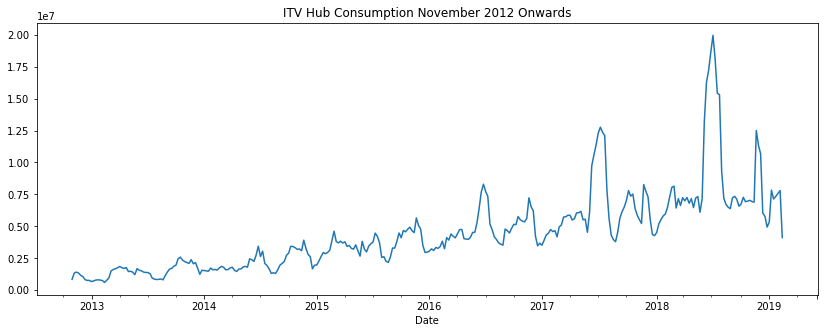

In [42]:
fig, ax = plt.subplots(figsize = (14,5))
ax = consumption.plot(title = "ITV Hub Consumption November 2012 Onwards")

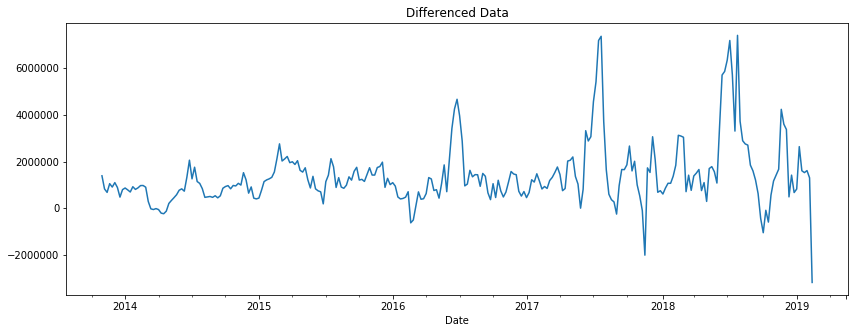

In [49]:
ts_diff = consumption.diff(52).dropna()
fig, ax = plt.subplots(figsize = (14,5))
ax = ts_diff.plot(title = "Differenced Data")

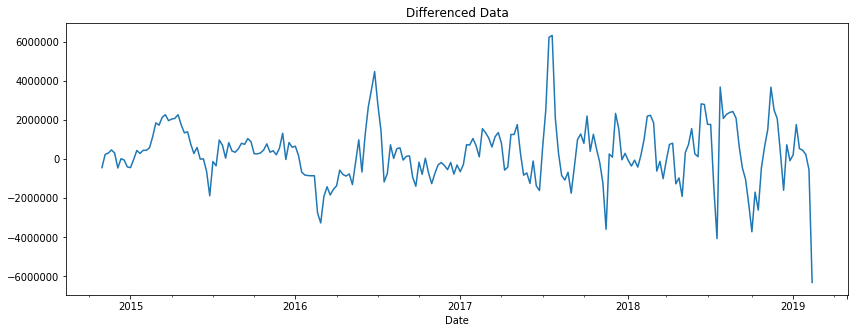

In [50]:
ts_diff_2 = ts_diff.diff(52).dropna()
fig, ax = plt.subplots(figsize = (14,5))
ax = ts_diff_2.plot(title = "Differenced Data")

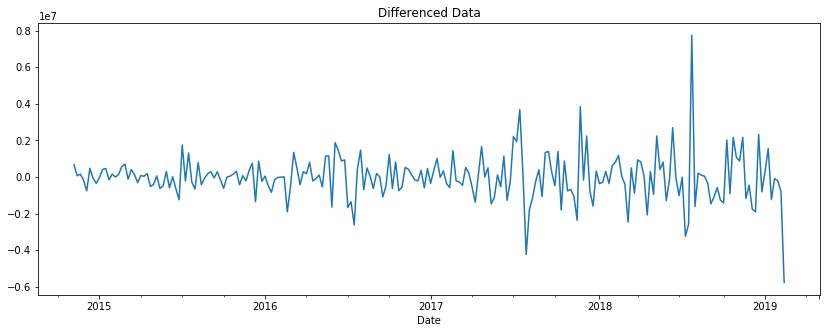

In [51]:
ts_diff_3 = ts_diff_2.diff().dropna()
fig, ax = plt.subplots(figsize = (14,5))
ax = ts_diff_3.plot(title = "Differenced Data")

In [10]:
##consumption_log = np.log10(consumption['consumption'])

In [11]:
##ts1 = pd.Series(consumption_log)

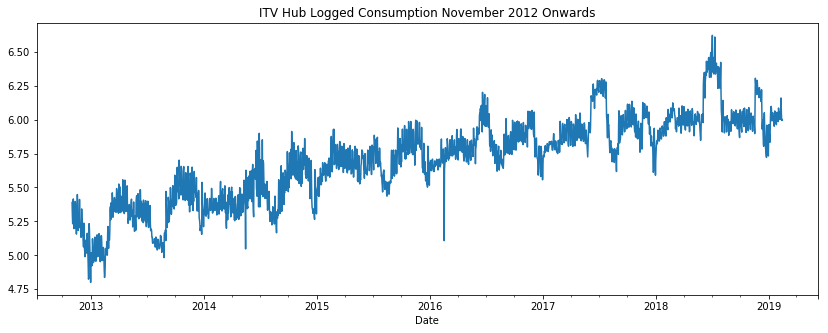

In [12]:
##fig, ax = plt.subplots(figsize = (14,5))
##ax = ts1.plot(title = "ITV Hub Logged Consumption November 2012 Onwards")

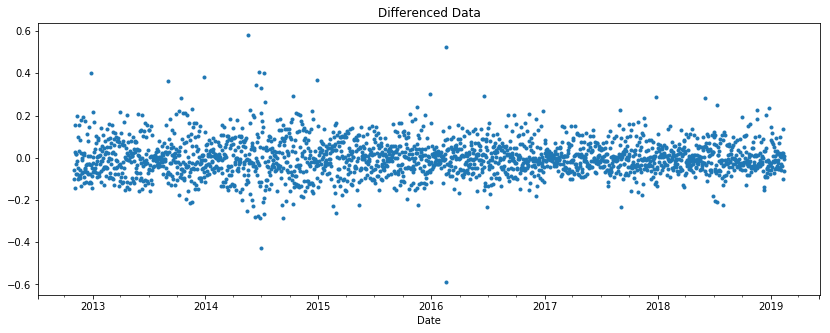

In [13]:
##ts1_diff = ts1.diff()
##fig, ax = plt.subplots(figsize = (14,5))
##ax = ts1_diff.plot(title = "Differenced Data")

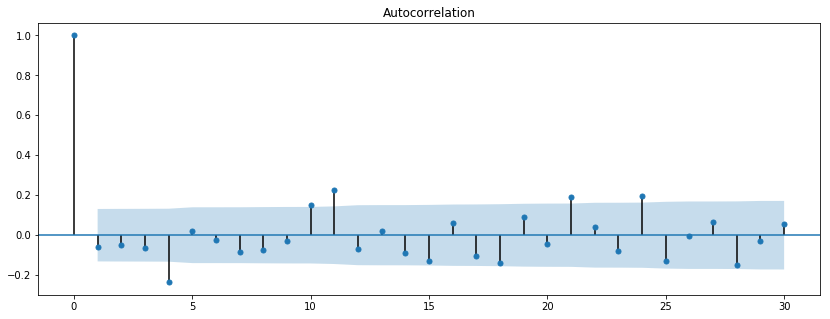

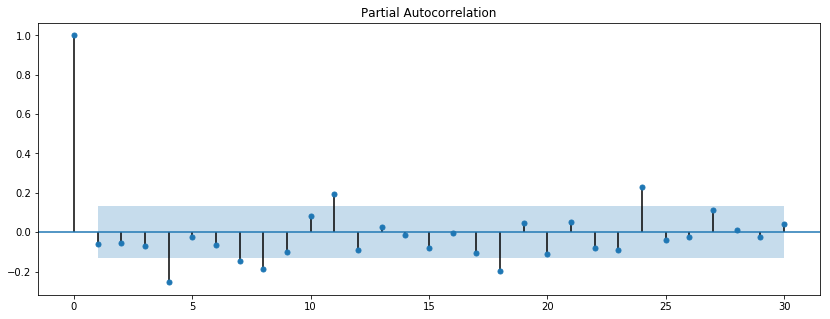

In [52]:
with mpl.rc_context():
    mpl.rc("figure", figsize = (14,5))
    plot_acf(ts_diff_3[1:], lags = 30)
    plot_pacf(ts_diff_3[1:], lags = 30)

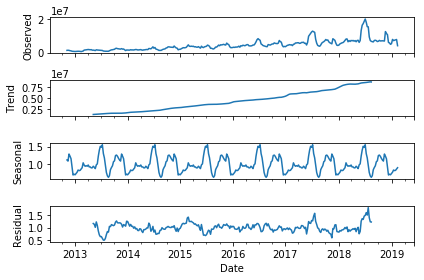

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

series = consumption[1:]
result = seasonal_decompose(series, model = 'multiplivcative', freq = 52)
result.plot()
pyplot.show()

In [ ]:
##from statsmodels.tsa.seasonal import seasonal_decompose
##from matplotlib import pyplot

##series = ts1[1:]
##result = seasonal_decompose(series, model = 'multiplivcative', freq = 52)
##result.plot()
##pyplot.show()